In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn.utils
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)
# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D,MaxPool1D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
transactions = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

Mounted at /content/drive


In [ ]:
transactions.shape

(284807, 31)

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
transactions.isnull().any().any()

False

In [ ]:
transactions['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
transactions['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [ ]:
X = transactions.drop(labels='Class', axis=1) # Features
y = transactions.loc[:,'Class']#response
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=1, stratify=y)
X_train.shape

(28480, 30)

In [ ]:
X_test.shape

(256327, 30)

In [ ]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile = 75)
select.fit(X_train,y_train)
SelectPercentile(percentile=74)
X_train_selected=select.transform(X_train)
X_test_selected=select.transform(X_test)
print('X_train.shape is :{}'.format(X_train.shape))

X_train.shape is :(28480, 30)


In [ ]:
print('X_train_selected.shape is :{}'.format(X_train_selected.shape))

X_train_selected.shape is :(28480, 22)


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
print('After OverSampling, the shape of train_y: {} '.format(y_train_res.shape))

After OverSampling, the shape of train_y: (56862,) 


In [ ]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))

After OverSampling, counts of label '1': 28431


In [ ]:
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '0': 28431


In [ ]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
X=stdscaler.fit_transform(X)
X

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [ ]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
X_train_selected=X_train_selected.reshape(X_train_selected.shape[0],X_train_selected.shape[1],1)
X_test_selected=X_test_selected.reshape(X_test_selected.shape[0],X_test_selected.shape[1],1)

In [ ]:
X_train_selected.shape

(28480, 22, 1)

In [ ]:
X_test_selected.shape

(256327, 22, 1)

In [ ]:
y_train.shape

(28480,)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

In [ ]:
model= Sequential()
model.add(GRU(units=22,return_sequences=True,input_shape=(X_train_selected.shape[1],1),activation='sigmoid'))
model.add(Dropout(0.2))
model.add(GRU(units=10,return_sequences=False,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 22, 22)            1650      
                                                                 
 dropout (Dropout)           (None, 22, 22)            0         
                                                                 
 gru_1 (GRU)                 (None, 10)                1020      
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 2,681
Trainable params: 2,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history= model.fit(X_train_selected,y_train,epochs=10,validation_data=(X_test_selected,y_test),verbose=1)

Epoch 1/10
890/890 [==============================] - 49s 53ms/step - loss: 0.1735 - accuracy: 0.9577 - val_loss: 0.0416 - val_accuracy: 0.9983
Epoch 2/10
890/890 [==============================] - 42s 47ms/step - loss: 0.0388 - accuracy: 0.9983 - val_loss: 0.0196 - val_accuracy: 0.9983
Epoch 3/10
890/890 [==============================] - 42s 47ms/step - loss: 0.0246 - accuracy: 0.9983 - val_loss: 0.0145 - val_accuracy: 0.9983
Epoch 4/10
890/890 [==============================] - 40s 44ms/step - loss: 0.0192 - accuracy: 0.9983 - val_loss: 0.0131 - val_accuracy: 0.9983
Epoch 5/10
890/890 [==============================] - 45s 51ms/step - loss: 0.0174 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 6/10
890/890 [==============================] - 40s 45ms/step - loss: 0.0159 - accuracy: 0.9983 - val_loss: 0.0128 - val_accuracy: 0.9983
Epoch 7/10
890/890 [==============================] - 41s 46ms/step - loss: 0.0154 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy:

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test_selected)
y_pred = (y_pred > 0.5)
score = model.evaluate(X_test_selected, y_test)

8011/8011 [==============================] - 38s 5ms/step - loss: 0.0063 - accuracy: 0.9983


In [ ]:
score

[0.0063002887181937695, 0.9982717633247375]

In [ ]:
#Let's see how our model performed
from sklearn.metrics import classification_report
classification_report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255884
           1       0.00      0.00      0.00       443

    accuracy                           1.00    256327
   macro avg       0.50      0.50      0.50    256327
weighted avg       1.00      1.00      1.00    256327



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[255884,      0],
       [   443,      0]])

In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test_selected).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras,pos_label=True)

8011/8011 [==============================] - 33s 4ms/step


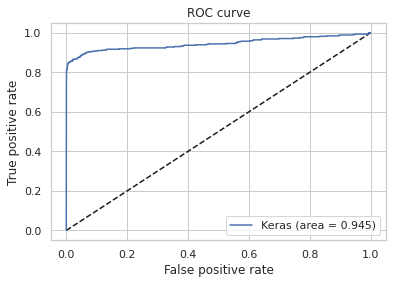

In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()